In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def initialize_centroids(data, k):
    # Randomly select k data points as initial centroids
    indices = np.random.choice(data.shape[0], k, replace=False)
    centroids = data[indices]
    return centroids

def assign_to_nearest_cluster(data, centroids):
    # Calculate Euclidean distances from each data point to all centroids
    distances = np.linalg.norm(data[:, np.newaxis, :] - centroids, axis=2)
    
    # Assign each data point to the cluster with the closest centroid
    labels = np.argmin(distances, axis=1)
    
    return labels

def update_centroids(data, labels, k):
    # Update centroids based on the mean of data points in each cluster
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    return centroids

def kmeans(data, k, max_iters=100):
    # Step 1: Initialize centroids
    centroids = initialize_centroids(data, k)
    
    for _ in range(max_iters):
        # Step 2: Assign each data point to the nearest cluster
        labels = assign_to_nearest_cluster(data, centroids)
        
        # Step 3: Update centroids
        new_centroids = update_centroids(data, labels, k)
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels

In [3]:
# Generate random data with two features
np.random.seed(42)
data = np.random.rand(100, 2)

In [4]:
# Specify the number of clusters (k)
k = 3

In [5]:
# Apply K-Means clustering
final_centroids, cluster_labels = kmeans(data, k)

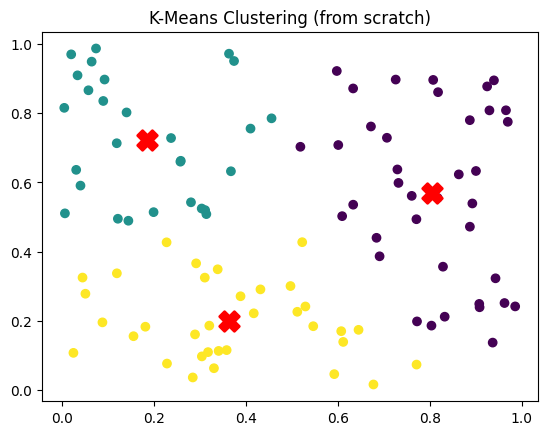

In [6]:
# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], marker='X', s=200, linewidths=2, color='red')
plt.title('K-Means Clustering (from scratch)')
plt.show()